In [1]:
import pandas as pd
import numpy as np

In [2]:
loans = pd.read_csv('kiva_loans.csv')

In [3]:
loans.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [4]:
loans.describe()

id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000

In [5]:
loans['shortage_fund'] =  loans['loan_amount'] -loans['funded_amount']

In [6]:
loans[['funded_amount','loan_amount','shortage_fund','lender_count']]


loans.plot(kind='scatter',x='lender_count',y='loan_amount')

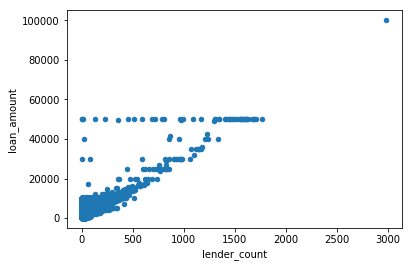

In [7]:
import matplotlib.pyplot as plt

plt.savefig('plots/LenderCount_vs_LoanAmount.jpg')

plt.show()

In [8]:
plt.show()

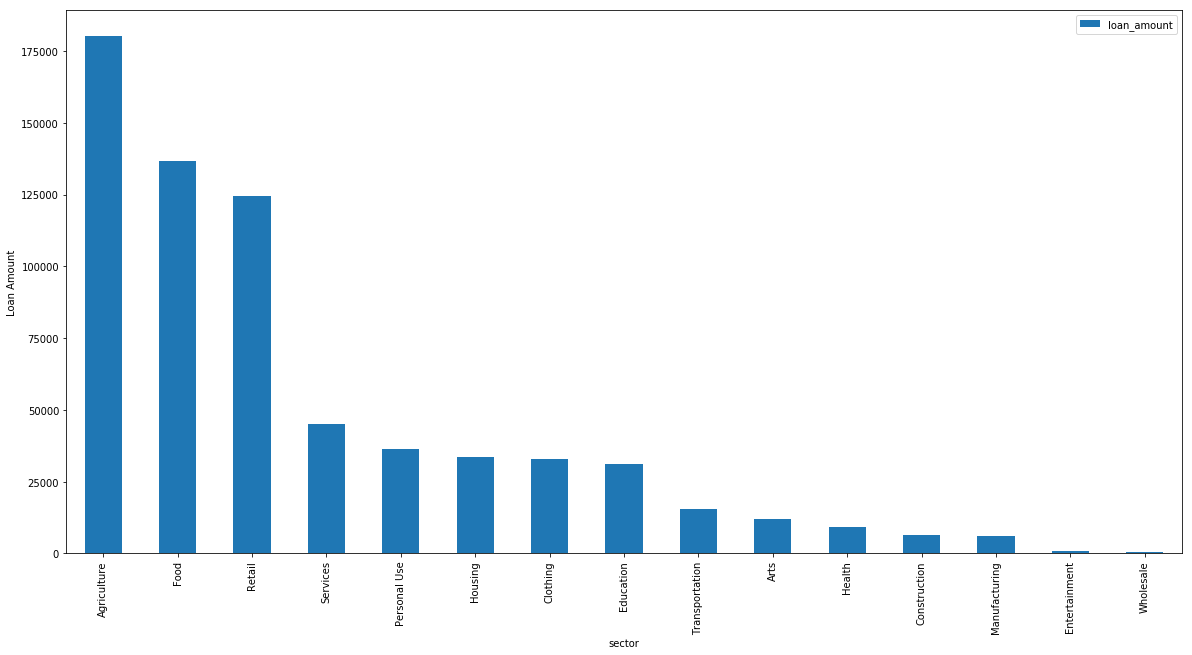

In [9]:
cat_cols = ['sector','country','repayment_interval']

for col in cat_cols:
    col_amt = pd.DataFrame(loans.groupby(col)['loan_amount'].count())
    col_amt = col_amt.sort_values('loan_amount', ascending=False)
    plt.figure(figsize=(20,10))
    col_amt.plot(kind='bar',figsize=(20, 10))
    plt.xlabel(col)
    plt.ylabel('Loan Amount')
    plt.savefig(f'plots/Bar_chart_{col}.jpg')
    plt.show()

In [10]:
def gender_count(ppl,gender):
    count = 0
    for p in ppl:
        p = p.replace(' ','')
        if(p == gender):
            count = count+1
            
    return count

def female_count(ppl):
    return gender_count(ppl,'female')

def male_count(ppl):
    return gender_count(ppl,'male')
            
loans['borrowers'] = [str(x).split(',') for x in loans['borrower_genders']]
loans['female_count'] = loans['borrowers'].apply(female_count)
loans['male_count'] = loans['borrowers'].apply(male_count)

In [11]:
loans[['borrowers','male_count','female_count']]

borrowers  male_count  female_count
0                         [female]           0             1
1                [female,  female]           0             2
2                         [female]           0             1
3                         [female]           0             1
4                         [female]           0             1
5                         [female]           0             1
6                         [female]           0             1
7                         [female]           0             1
8                         [female]           0             1
9                         [female]           0             1
10                        [female]           0             1
11                        [female]           0             1
12                        [female]           0             1
13                        [female]           0             1
14                        [female]           0             1
15                        [female]           0             1
16                        [female]           0             1
17      [female,  female,  female]           0             3
18                        [female]           0             1
19                        [female]           0             1
20                        [female]           0             1
21                        [female]           0             1
22               [female,  female]           0             2
23                        [female]           0             1
24                        [female]           0             1
25                        [female]           0             1
26                        [female]           0             1
27                        [female]           0             1
28                        [female]           0             1
29                        [female]           0             1
...                            ...         ...           ...
671175           [female,  female]           0             2
671176           [female,  female]           0             2
671177                    [female]           0             1
671178                       [nan]           0             0
671179                    [female]           0             1
671180                    [female]           0             1
671181                    [female]           0             1
671182           [female,  female]           0             2
671183                    [female]           0             1
671184           [female,  female]           0             2
671185                       [nan]           0             0
671186                    [female]           0             1
671187                    [female]           0             1
671188                    [female]           0             1
671189                    [female]           0             1
671190                    [female]           0             1
671191                    [female]           0             1
671192           [female,  female]           0             2
671193           [female,  female]           0             2
671194           [female,  female]           0             2
671195           [female,  female]           0             2
671196                    [female]           0             1
671197                    [female]           0             1
671198                    [female]           0             1
671199                    [female]           0             1
671200                    [female]           0             1
671201                    [female]           0             1
671202                       [nan]           0             0
671203                    [female]           0             1
671204                    [female]           0             1

[671205 rows x 3 columns]

In [12]:
loans['male_count'].sum()

274904

In [13]:
loans['female_count'].sum()

1071308

In [14]:
sector_grp = loans.groupby('sector')

In [15]:
Usage_df = pd.DataFrame(sector_grp['use'].apply(lambda x: ' '.join(x.astype(str))))

Usage_df = Usage_df.reset_index()

In [16]:
Usage_df.to_csv('loans_usage.csv')

In [17]:
Usage_df.head()

sector                                                use
0   Agriculture  To purchase a dairy cow and start a milk produ...
1          Arts  to purchase an embroidery machine and a variet...
2      Clothing  to purchase variety of winter clothes to sell....
3  Construction  to purchase stones for starting a business sup...
4     Education  to purchase furniture for husband's academy. t...

In [18]:
from wordcloud import WordCloud

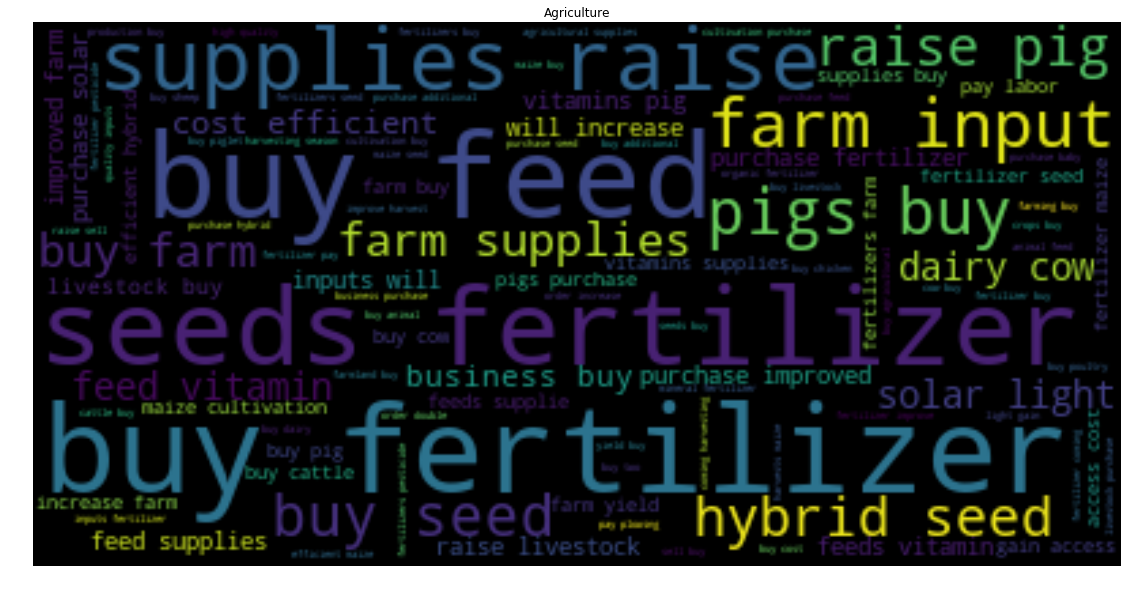

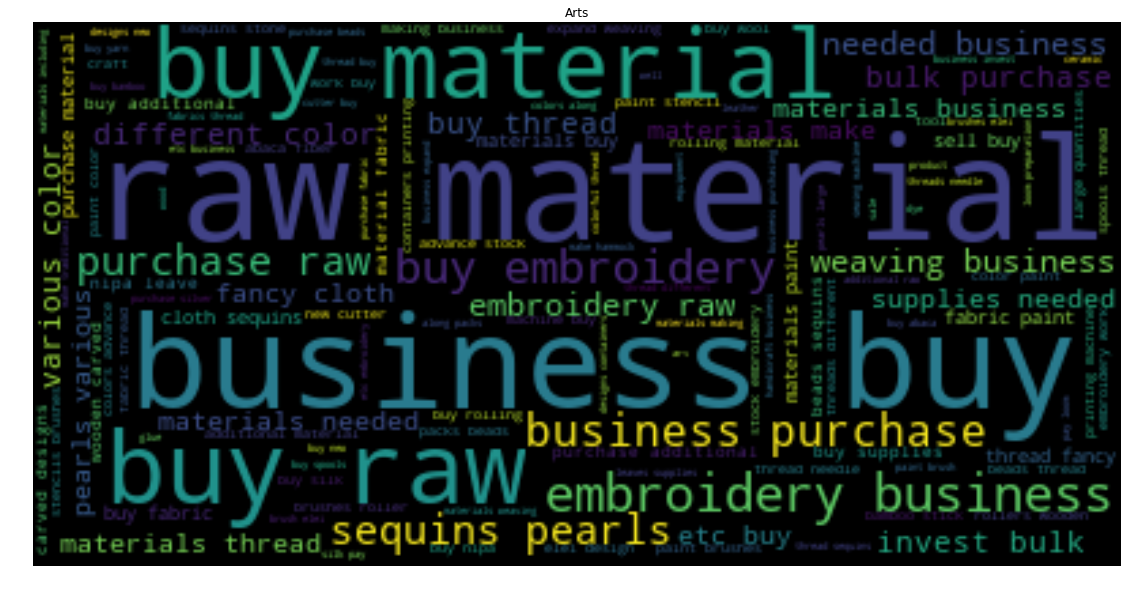

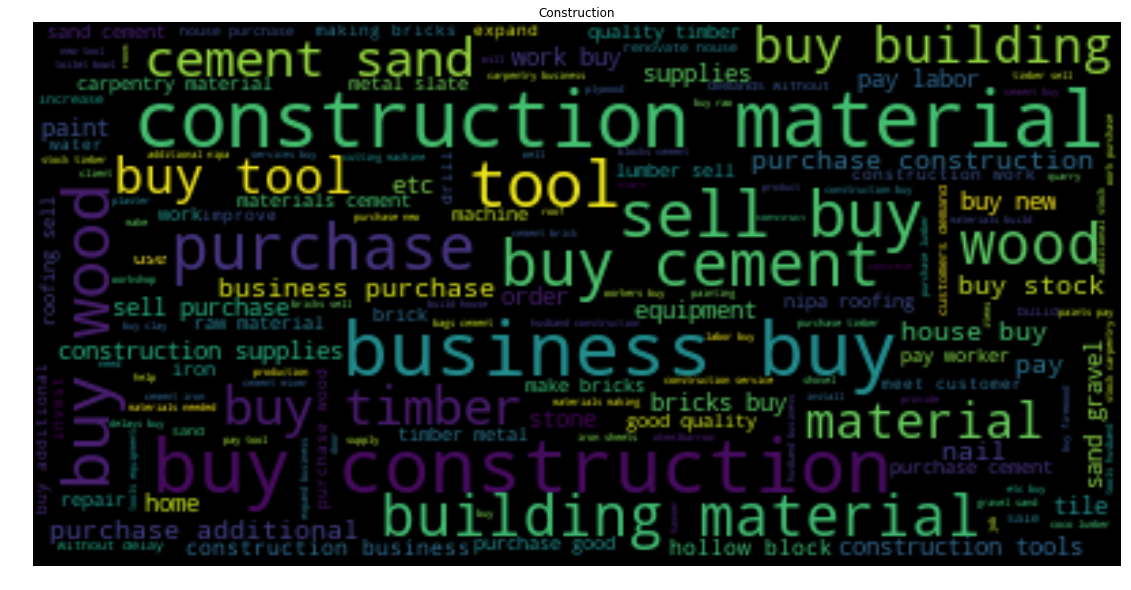

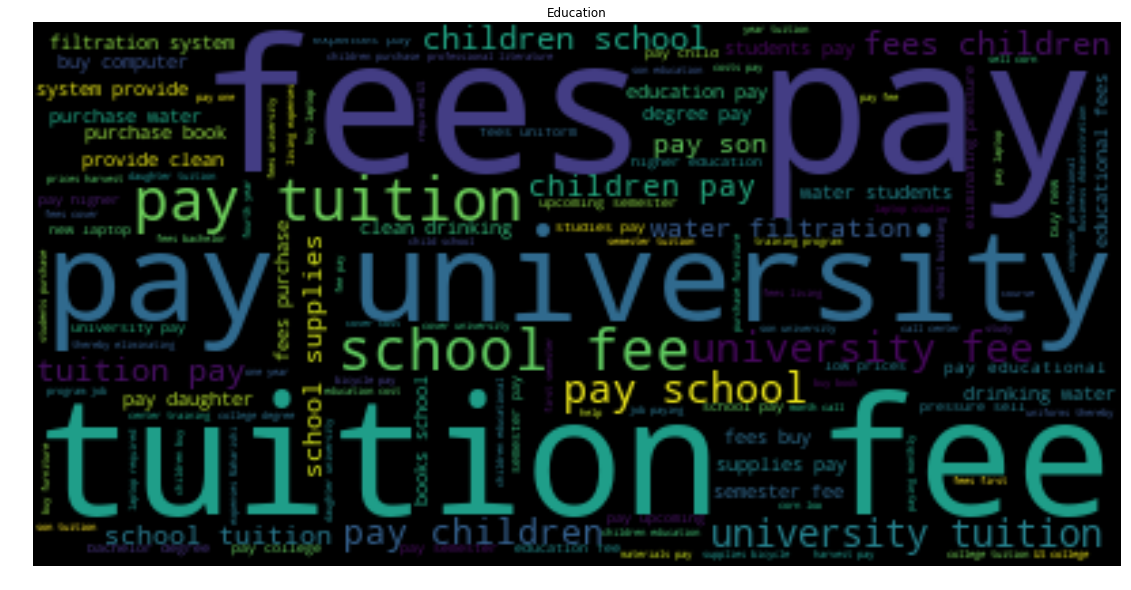

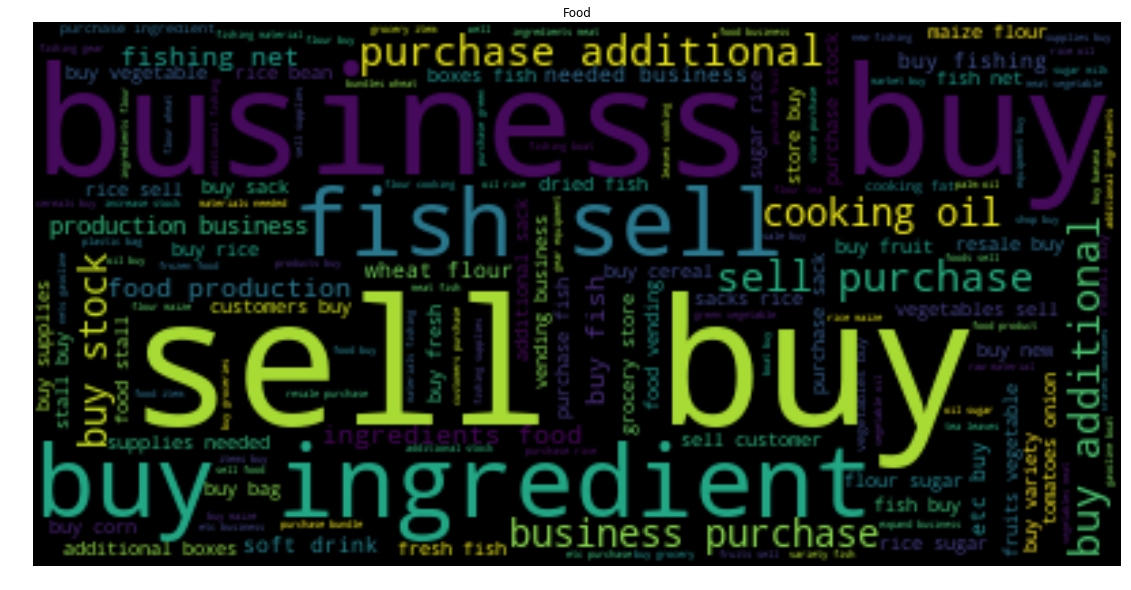

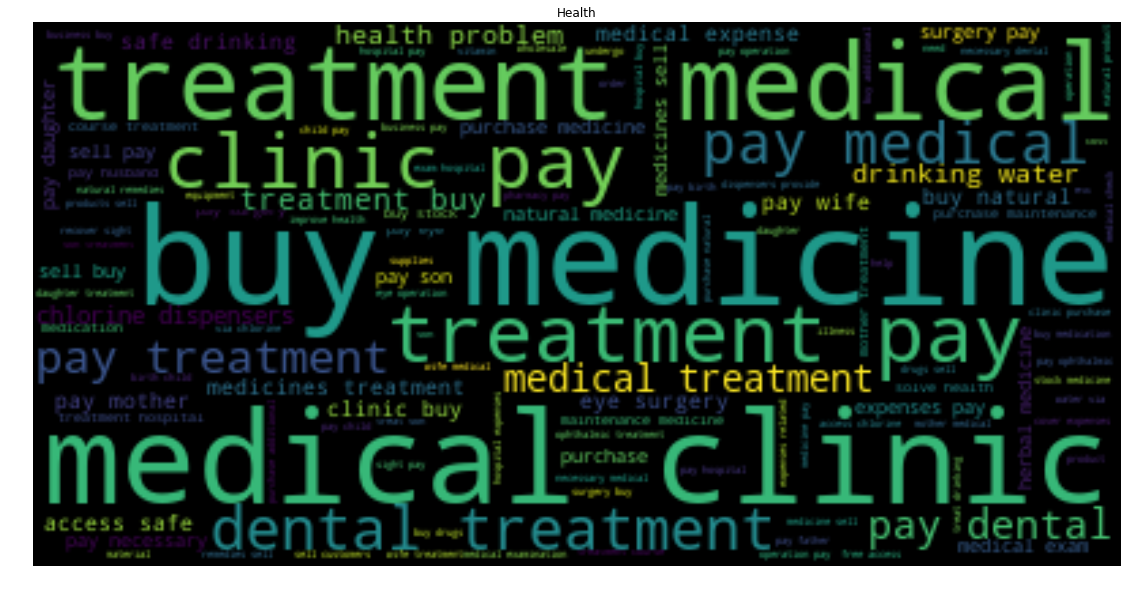

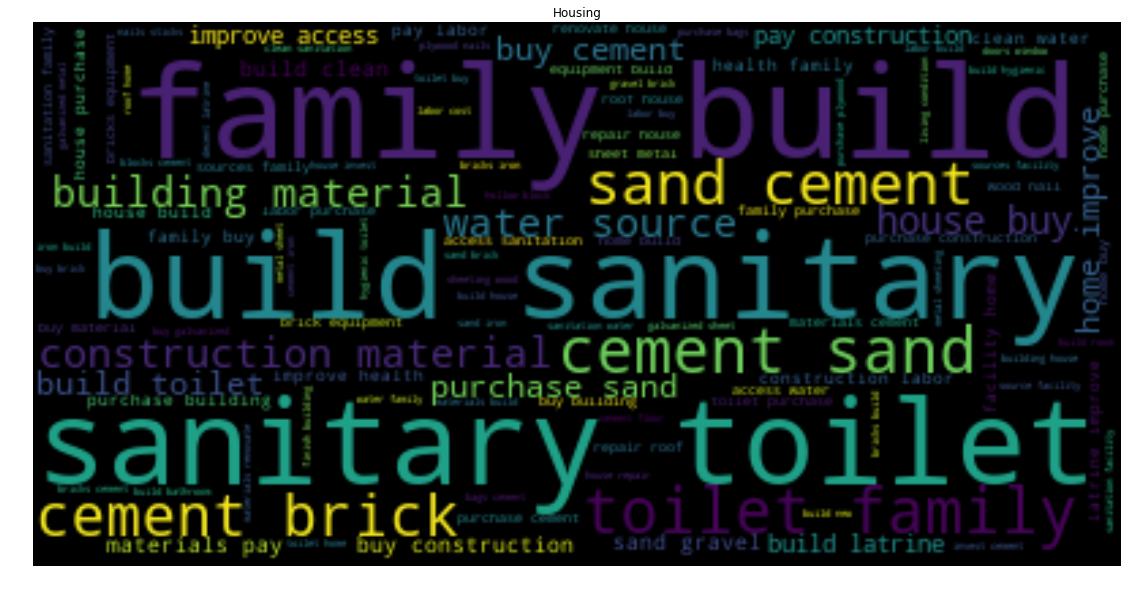

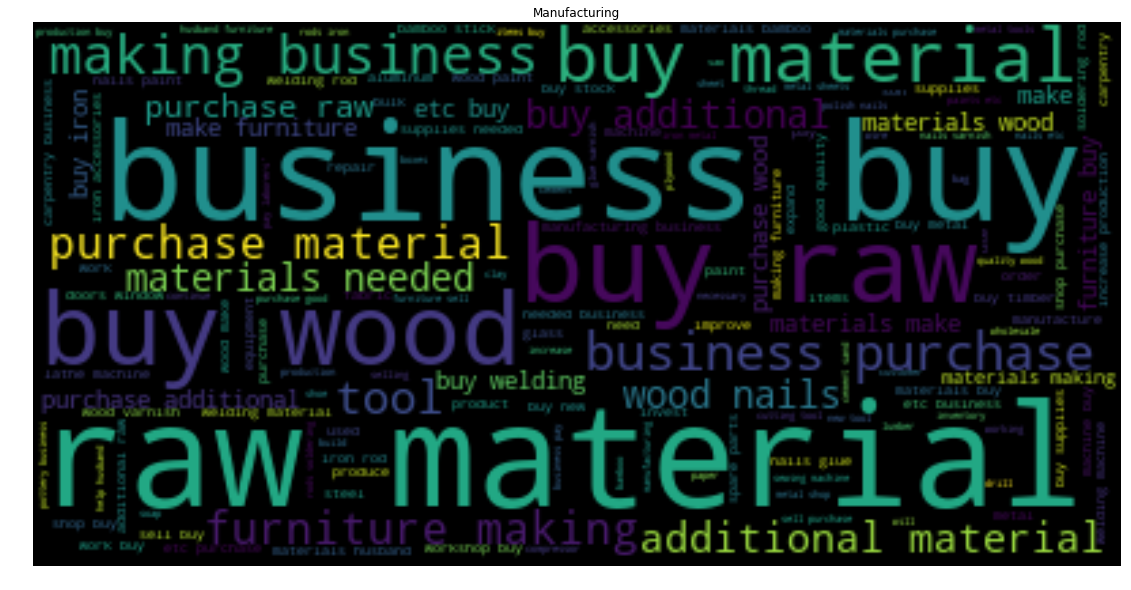

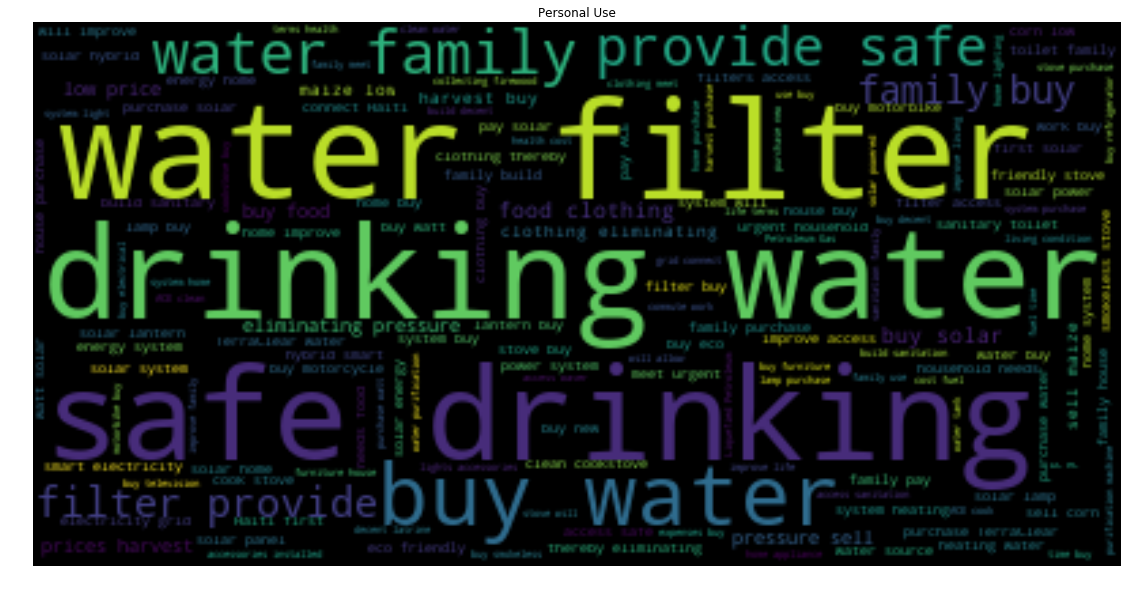

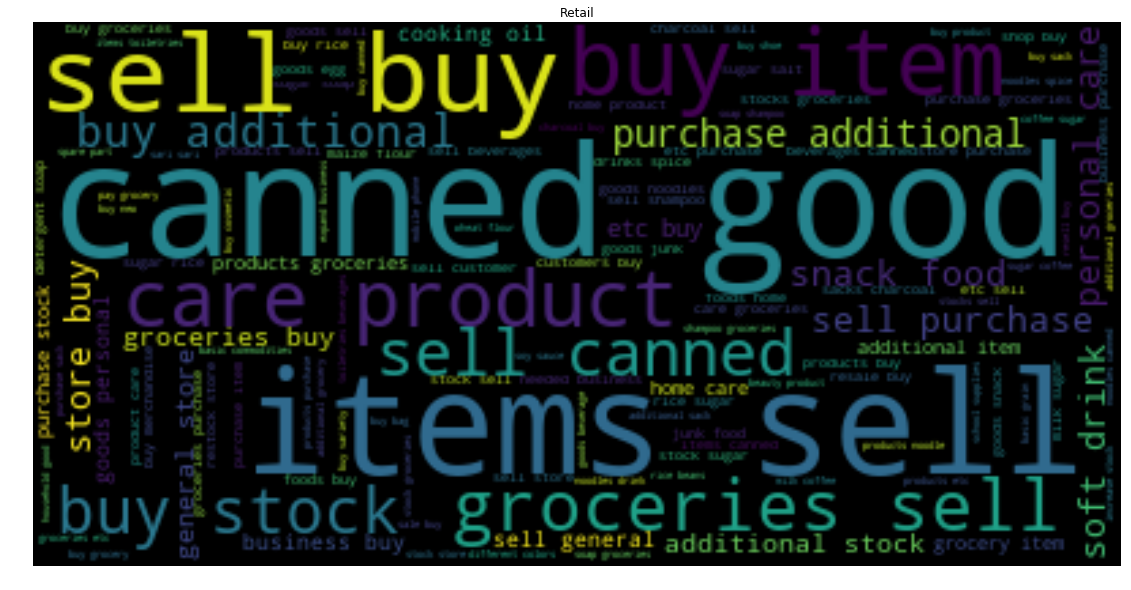

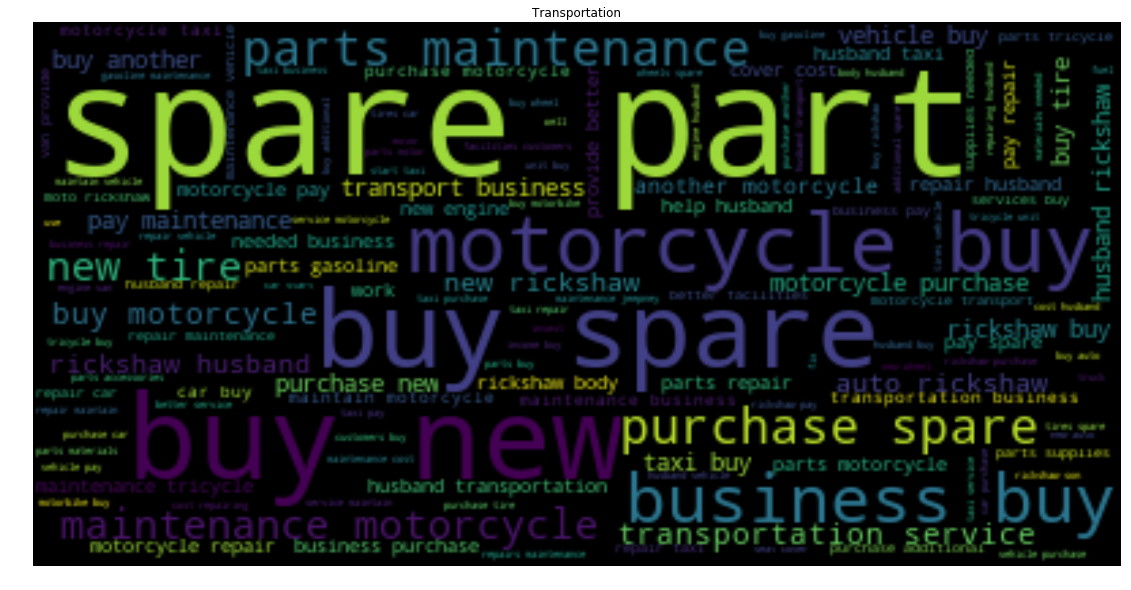

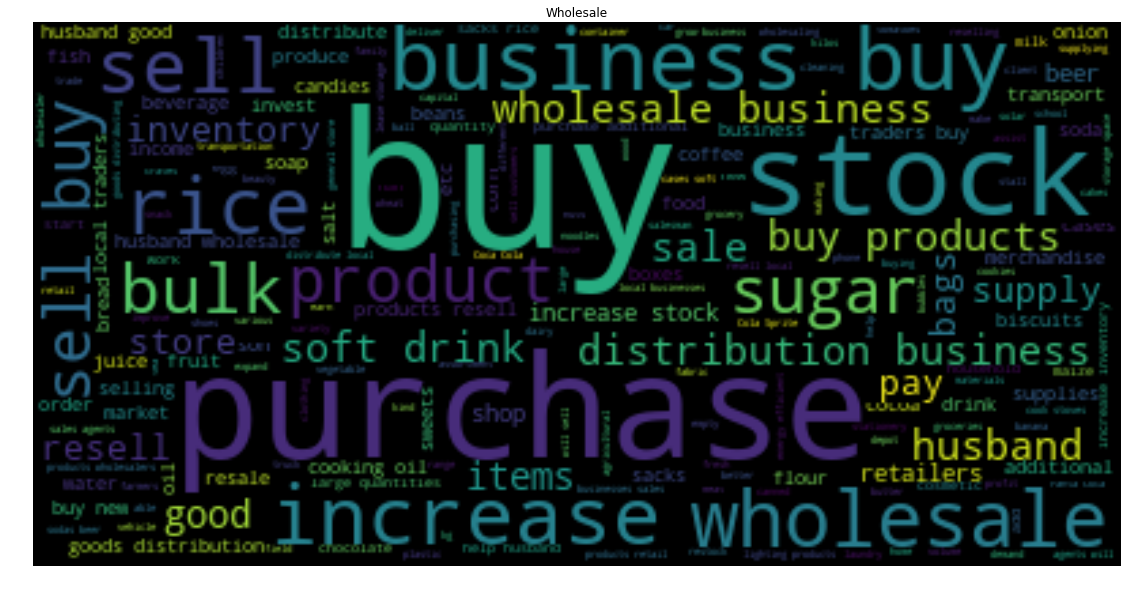

In [19]:
for index, row in Usage_df.iterrows():
    wordcloud = WordCloud().generate(row['use'])
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(row['sector'])
    plt.axis("off")
    plt.savefig(f'plots/WordCloud_{row["sector"]}.jpg')
    plt.show()

In [20]:
exchange_rate_df = pd.read_csv('exchangerate.csv')

exchange_rate_df.head()

Currency code      Currency name    Units per USD  USD per Unit
0             USD          US Dollar       1.000000      1.000000
1             EUR               Euro       0.833430      1.199861
2             GBP      British Pound       0.740581      1.350291
3             INR       Indian Rupee      63.849907      0.015662
4             AUD  Australian Dollar       1.279731      0.781414

In [21]:
loans.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency    ...      term_in_months lender_count  \
0        Lahore      PKR    ...                12.0           12   
1        Lahore      PKR    ...                11.0           14   
2     Maynaguri      INR    ...                43.0            6   
3        Lahore      PKR    ...                11.0            8   
4  Abdul Hakeem      PKR    ...                14.0           16   

                           tags borrower_genders  repayment_interval  \
0                           NaN           female           irregular   
1                           NaN   female, female           irregular   
2  user_favorite, user_favorite           female              bullet   
3                           NaN           female           irregular   
4                           NaN           female             monthly   

         date shortage_fund          borrowers female_count male_count  
0  2014-01-01           0.0           [female]            1          0  
1  2014-01-01           0.0  [female,  female]            2          0  
2  2014-01-01           0.0           [female]            1          0  
3  2014-01-01           0.0           [female]            1          0  
4  2014-01-01           0.0           [female]            1          0  

[5 rows x 24 columns]

In [22]:
exchange_rate_df.columns = [['currency', 'name', 'units_per_usd', 'usd_per_unit']]

In [23]:
exchange_rate_df.head()

currency               name  units_per_usd  usd_per_unit
0      USD          US Dollar       1.000000      1.000000
1      EUR               Euro       0.833430      1.199861
2      GBP      British Pound       0.740581      1.350291
3      INR       Indian Rupee      63.849907      0.015662
4      AUD  Australian Dollar       1.279731      0.781414

In [24]:
loans_usd = loans.merge(exchange_rate_df,on='currency')

In [25]:
loans_usd.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653063          200.0        200.0           Embroidery            Arts   
3  653084          400.0        400.0           Milk Sales            Food   
4  653078          400.0        400.0         Beauty Salon        Services   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  to purchase an embroidery machine and a variet...           PK  Pakistan   
3                           to purchase one buffalo.           PK  Pakistan   
4         to buy more hair and skin care products.             PK  Pakistan   

         region currency     ...       borrower_genders repayment_interval  \
0        Lahore      PKR     ...                 female          irregular   
1        Lahore      PKR     ...         female, female          irregular   
2        Lahore      PKR     ...                 female          irregular   
3  Abdul Hakeem      PKR     ...                 female            monthly   
4     Ellahabad      PKR     ...                 female            monthly   

         date shortage_fund          borrowers  female_count male_count  \
0  2014-01-01           0.0           [female]             1          0   
1  2014-01-01           0.0  [female,  female]             2          0   
2  2014-01-01           0.0           [female]             1          0   
3  2014-01-01           0.0           [female]             1          0   
4  2014-01-01           0.0           [female]             1          0   

              name units_per_usd usd_per_unit  
0  Pakistani Rupee    110.674614     0.009035  
1  Pakistani Rupee    110.674614     0.009035  
2  Pakistani Rupee    110.674614     0.009035  
3  Pakistani Rupee    110.674614     0.009035  
4  Pakistani Rupee    110.674614     0.009035  

[5 rows x 27 columns]

In [26]:
loans_usd['funded_amount_usd'] = loans_usd['funded_amount']*loans_usd['usd_per_unit']

loans_usd['funded_amount_usd'].head()

0    2.710649
1    5.195410
2    1.807099
3    3.614198
4    3.614198
Name: funded_amount_usd, dtype: float64

In [27]:
loans_usd['loan_amount_usd'] = loans_usd['loan_amount']*loans_usd['usd_per_unit']

loans_usd['loan_amount_usd'].head()

0    2.710649
1    5.195410
2    1.807099
3    3.614198
4    3.614198
Name: loan_amount_usd, dtype: float64

In [28]:
loans_usd.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653063          200.0        200.0           Embroidery            Arts   
3  653084          400.0        400.0           Milk Sales            Food   
4  653078          400.0        400.0         Beauty Salon        Services   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  to purchase an embroidery machine and a variet...           PK  Pakistan   
3                           to purchase one buffalo.           PK  Pakistan   
4         to buy more hair and skin care products.             PK  Pakistan   

         region currency       ...              date shortage_fund  \
0        Lahore      PKR       ...        2014-01-01           0.0   
1        Lahore      PKR       ...        2014-01-01           0.0   
2        Lahore      PKR       ...        2014-01-01           0.0   
3  Abdul Hakeem      PKR       ...        2014-01-01           0.0   
4     Ellahabad      PKR       ...        2014-01-01           0.0   

           borrowers female_count  male_count             name units_per_usd  \
0           [female]            1           0  Pakistani Rupee    110.674614   
1  [female,  female]            2           0  Pakistani Rupee    110.674614   
2           [female]            1           0  Pakistani Rupee    110.674614   
3           [female]            1           0  Pakistani Rupee    110.674614   
4           [female]            1           0  Pakistani Rupee    110.674614   

  usd_per_unit funded_amount_usd loan_amount_usd  
0     0.009035          2.710649        2.710649  
1     0.009035          5.195410        5.195410  
2     0.009035          1.807099        1.807099  
3     0.009035          3.614198        3.614198  
4     0.009035          3.614198        3.614198  

[5 rows x 29 columns]

In [29]:
loans_usd.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'shortage_fund', 'borrowers', 'female_count', 'male_count',
       'name', 'units_per_usd', 'usd_per_unit', 'funded_amount_usd',
       'loan_amount_usd'],
      dtype='object')

In [30]:
cleaned_loans = loans_usd[['id', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'repayment_interval',
       'date', 'shortage_fund', 'female_count', 'male_count', 'funded_amount_usd','loan_amount_usd']]

In [31]:
cleaned_loans.isnull().sum()

id                         0
activity                   0
sector                     0
use                     4192
country_code               8
country                    0
region                 56764
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171346
repayment_interval         0
date                       0
shortage_fund              0
female_count               0
male_count                 0
funded_amount_usd          0
loan_amount_usd            0
dtype: int64

In [32]:
cleaned_loans.dtypes

id                      int64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
repayment_interval     object
date                   object
shortage_fund         float64
female_count            int64
male_count              int64
funded_amount_usd     float64
loan_amount_usd       float64
dtype: object

In [33]:
cleaned_loans[['posted_time','disbursed_time','funded_time','date']].head()

posted_time             disbursed_time  \
0  2014-01-01 06:12:39+00:00  2013-12-17 08:00:00+00:00   
1  2014-01-01 06:51:08+00:00  2013-12-17 08:00:00+00:00   
2  2014-01-01 08:03:11+00:00  2013-12-24 08:00:00+00:00   
3  2014-01-01 11:53:19+00:00  2013-12-17 08:00:00+00:00   
4  2014-01-01 11:46:01+00:00  2013-12-20 08:00:00+00:00   

                 funded_time        date  
0  2014-01-02 10:06:32+00:00  2014-01-01  
1  2014-01-02 09:17:23+00:00  2014-01-01  
2  2014-01-01 13:00:00+00:00  2014-01-01  
3  2014-01-01 19:18:51+00:00  2014-01-01  
4  2014-01-10 18:18:44+00:00  2014-01-01

In [34]:
cleaned_loans.loc[:,('posted_time')] = pd.to_datetime(cleaned_loans['posted_time'],format='%Y-%m-%d %H:%M:%S')
cleaned_loans.loc[:,('disbursed_time')] = pd.to_datetime(cleaned_loans['disbursed_time'],format='%Y-%m-%d %H:%M:%S')
cleaned_loans.loc[:,('funded_time')] = pd.to_datetime(cleaned_loans['funded_time'],format='%Y-%m-%d %H:%M:%S')
cleaned_loans.loc[:,('date')] = pd.to_datetime(cleaned_loans['date'],format='%Y-%m-%d')

C:\Users\ssank\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
cleaned_loans.loc[:,('posted_disbursed_diff')] = cleaned_loans['disbursed_time'] - cleaned_loans['posted_time']

C:\Users\ssank\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ssank\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
cleaned_loans.dtypes

id                                 int64
activity                          object
sector                            object
use                               object
country_code                      object
country                           object
region                            object
currency                          object
partner_id                       float64
posted_time               datetime64[ns]
disbursed_time            datetime64[ns]
funded_time               datetime64[ns]
term_in_months                   float64
lender_count                       int64
tags                              object
repayment_interval                object
date                      datetime64[ns]
shortage_fund                    float64
female_count                       int64
male_count                         int64
funded_amount_usd                float64
loan_amount_usd                  float64
posted_disbursed_diff    timedelta64[ns]
dtype: object

In [37]:
(cleaned_loans['posted_disbursed_diff'] / pd.Timedelta(minutes=30)).hist(bins=100)


In [38]:
plt.show()

In [39]:
mpi_regions_df = pd.read_csv('kiva_mpi_region_locations.csv')

In [40]:
mpi_regions_df.head()

LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210

In [61]:
mpi_regions_df['color_index'] = mpi_regions_df['MPI']*100

In [67]:
mpi_regions_df.plot(kind='scatter',x='lon',y='lat',c='color_index',cmap='YlOrRd', figsize=(20,10))

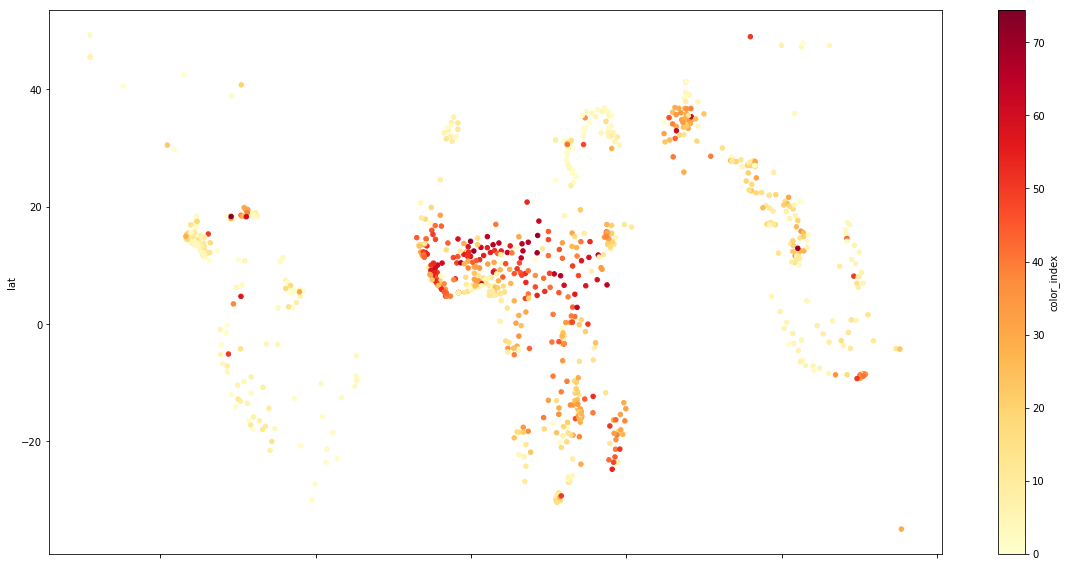

In [68]:
plt.savefig('plots/PovertyIndex.jpg')

plt.show()